In [1]:
import pandas as pd
import numpy as np

In [2]:
audit = pd.read_csv('audit_risk.csv')

In [3]:
print(audit.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


# Fill NA Values

In [4]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())

In [5]:
trial = pd.read_csv('trial.csv')

In [6]:
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

In [7]:
print(trial.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [8]:
#audit.columns = map(str.lower, audit.columns)

In [9]:
#trial.columns = map(str.lower, trial.columns)

In [10]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [11]:
trial.dtypes #scorea and scoreb(make float),

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [12]:
trial['SCORE_A']=trial['SCORE_A'].astype(float)

In [13]:
trial['SCORE_B']=trial['SCORE_B'].astype(float)

In [14]:
#data=audit.merge(trial, left_on='location_id', right_on='location_id')

In [15]:
#data.shape

# Remove outliers in audit

In [16]:
audit.shape

(776, 27)

In [17]:
from scipy import stats
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.67046481 0.30480033 1.42984618 ...        nan 0.14112307 1.24268351]
 [0.67046481 0.43173627 0.86976136 ...        nan 0.17228042 0.80471013]
 [0.67046481 0.34187176 0.86976136 ...        nan 0.17748711 0.80471013]
 ...
 [1.45599165 0.38944709 0.86976136 ...        nan 0.17796327 0.80471013]
 [1.45599165 0.39649529 0.86976136 ...        nan 0.17804608 0.80471013]
 [1.45599165 0.43173627 0.86976136 ...        nan 0.17792186 0.80471013]]


C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [18]:
outlier =list((np.where(z > 3)))

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [19]:
rows=set(outlier[0])

In [20]:
delrows =list(rows)

In [21]:
audit_dt=audit.drop(delrows)

# Remove 100% Skewed Columns

In [22]:
#Removing 100% skewed data as they are totally useless and does not help in modeling
for i in range(0,len(audit_dt.columns)):
    print(audit_dt.columns.values[i],' is---->   {:,.2f}'.format(audit_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.65 % skewed 
LOCATION_ID  is---->   9.78 % skewed 
PARA_A  is---->   20.25 % skewed 
Score_A  is---->   56.01 % skewed 
Risk_A  is---->   20.25 % skewed 
PARA_B  is---->   37.43 % skewed 
Score_B  is---->   70.53 % skewed 
Risk_B  is---->   37.43 % skewed 
TOTAL  is---->   12.29 % skewed 
numbers  is---->   94.55 % skewed 
Score_B.1  is---->   94.55 % skewed 
Risk_C  is---->   94.55 % skewed 
Money_Value  is---->   45.53 % skewed 
Score_MV  is---->   78.21 % skewed 
Risk_D  is---->   45.67 % skewed 
District_Loss  is---->   85.47 % skewed 
PROB  is---->   100.00 % skewed 
RiSk_E  is---->   85.47 % skewed 
History  is---->   95.95 % skewed 
Prob  is---->   95.95 % skewed 
Risk_F  is---->   95.95 % skewed 
Score  is---->   40.50 % skewed 
Inherent_Risk  is---->   7.26 % skewed 
CONTROL_RISK  is---->   81.98 % skewed 
Detection_Risk  is---->   100.00 % skewed 
Audit_Risk  is---->   7.26 % skewed 
Risk  is---->   65.50 % skewed 


In [23]:
audit_dt.drop(['PROB'], axis=1, inplace = True)

In [24]:
audit_dt.drop(['Detection_Risk'], axis=1, inplace = True)

In [25]:
audit_dt.shape

(716, 25)

# Remove Outliers in Trial

In [26]:
trial.shape

(776, 18)

In [27]:
from scipy import stats
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

[[0.67046481 0.30480033 1.42984618 ... 0.24656792 0.35250258 0.77246865]
 [0.67046481 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [0.67046481 0.34187176 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 ...
 [1.45599165 0.38944709 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.39649529 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]]


In [28]:
outlier =list((np.where(z > 3)))

In [29]:
rows=set(outlier[0])

In [30]:
delrows =list(rows)

In [31]:
trial_dt=trial.drop(delrows)

# Remove 100% Skewed Columns 

In [32]:
for i in range(0,len(trial_dt.columns)):
    print(trial_dt.columns.values[i],' is---->   {:,.2f}'.format(trial_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.65 % skewed 
LOCATION_ID  is---->   9.78 % skewed 
PARA_A  is---->   20.25 % skewed 
SCORE_A  is---->   56.01 % skewed 
PARA_B  is---->   37.43 % skewed 
SCORE_B  is---->   70.53 % skewed 
TOTAL  is---->   12.29 % skewed 
numbers  is---->   94.55 % skewed 
Marks  is---->   94.55 % skewed 
Money_Value  is---->   45.53 % skewed 
MONEY_Marks  is---->   78.21 % skewed 
District  is---->   85.47 % skewed 
Loss  is---->   100.00 % skewed 
LOSS_SCORE  is---->   100.00 % skewed 
History  is---->   95.95 % skewed 
History_score  is---->   95.95 % skewed 
Score  is---->   40.50 % skewed 
Risk  is---->   59.50 % skewed 


In [33]:
trial_dt.drop(['Loss'], axis=1, inplace = True)
trial_dt.drop(['LOSS_SCORE'], axis=1, inplace = True)

In [34]:
trial_dt.shape

(716, 16)

# Merge two datasets into one 

In [35]:
cols_use = trial_dt.columns.difference(audit_dt.columns)

In [36]:
cols_use

Index(['District', 'History_score', 'MONEY_Marks', 'Marks', 'SCORE_A',
       'SCORE_B'],
      dtype='object')

In [37]:
data = pd.merge(audit_dt,trial_dt[cols_use],how='inner',left_index=True, right_index=True)

In [38]:
data = data.drop(['SCORE_A','SCORE_B'],axis = 1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 775
Data columns (total 29 columns):
Sector_score     716 non-null float64
LOCATION_ID      716 non-null object
PARA_A           716 non-null float64
Score_A          716 non-null float64
Risk_A           716 non-null float64
PARA_B           716 non-null float64
Score_B          716 non-null float64
Risk_B           716 non-null float64
TOTAL            716 non-null float64
numbers          716 non-null float64
Score_B.1        716 non-null float64
Risk_C           716 non-null float64
Money_Value      716 non-null float64
Score_MV         716 non-null float64
Risk_D           716 non-null float64
District_Loss    716 non-null int64
RiSk_E           716 non-null float64
History          716 non-null int64
Prob             716 non-null float64
Risk_F           716 non-null float64
Score            716 non-null float64
Inherent_Risk    716 non-null float64
CONTROL_RISK     716 non-null float64
Audit_Risk       716 non-n

In [40]:
#data=audit_dt.merge(trial_dt, left_on='location_id', right_on='location_id')

In [41]:
data.shape

(716, 29)

# Remove Highly Correlated Columns

In [42]:
corrmat= (data.corr().abs())
highcorr=np.where(corrmat==1)



In [43]:
highcorr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 13, 14, 14,
        15, 16, 17, 17, 18, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 27, 27],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 27,  9, 10, 11, 12, 13, 14, 24,
        15, 16, 17, 18, 17, 18, 19, 20, 21, 22, 23, 14, 24, 25, 26,  8, 27],
       dtype=int64))

In [44]:
highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])

In [45]:
highcorr=list(highcorr)

In [46]:
for i in highcorr:
    print(i[0],'   ',i[1],'------>',data[i[0]].corr(data[i[1]]))
    

Risk_F     Prob ------> 1.0
District     District_Loss ------> 1.0
numbers     Marks ------> 0.9999999999999999
Prob     Risk_F ------> 1.0
District_Loss     District ------> 1.0
Marks     numbers ------> 0.9999999999999999


In [47]:
data = data.drop(['Marks','Risk_F','District'],axis = 1)

In [48]:
print(data.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
RiSk_E           0
History          0
Prob             0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
History_score    0
MONEY_Marks      0
dtype: int64


In [49]:
data.shape

(716, 26)

In [50]:
data.columns.values

array(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A',
       'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1',
       'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss',
       'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Audit_Risk', 'Risk', 'History_score',
       'MONEY_Marks'], dtype=object)

In [51]:
#data = pd.concat([data, pd.get_dummies(data['LOCATION_ID'], prefix='LOCID')], axis=1)
data.drop(['LOCATION_ID'], axis=1, inplace = True)



In [52]:
import csv
with open('data.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
    
csvfile.close()

data.to_csv('data.csv')

In [53]:
y = data['Audit_Risk']

In [54]:
data.drop(['Audit_Risk'],axis=1, inplace=True)

In [55]:
X = data

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [57]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

In [58]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk,History_score,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2,0.4,0,0.2,2.4,8.574,0.4,1,2,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2,0.4,0,0.2,2.0,2.554,0.4,0,2,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2,0.4,0,0.2,2.0,1.548,0.4,0,2,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2,0.4,0,0.2,2.0,1.416,0.4,0,2,2
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,2,0.4,0,0.2,2.0,2.156,0.4,0,2,2


In [59]:


Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# Regression

In [60]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.9076969062574484
0.8808764094840964


# Ridge

In [61]:
from sklearn.linear_model import Ridge
x_range = [0.001,0.01,0.1,1,10,100]
train_score_list=[]
test_score_list=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [62]:
print(train_score_list)
print(test_score_list)


[0.9024150212244078, 0.8975592888295388, 0.8962685445570476, 0.8946287514155248, 0.849946612163181, 0.651151835656014]
[0.8793554395889993, 0.8775331679705602, 0.8765728443046983, 0.8780111352899505, 0.8598475620309314, 0.7178619548233908]


Text(0.5,0,'$\\alpha$')

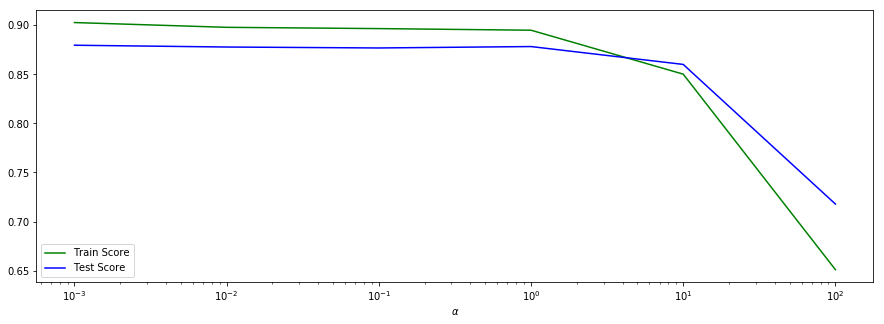

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [64]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8946
Test score: 0.8780


In [65]:
ridge.coef_

array([ 0.57067484,  0.39604554,  0.95241141,  1.42180992,  4.62455781,
       -0.24187596,  4.46893874,  4.13976669,  0.41409829,  0.41409829,
        0.41409829, 10.74343003,  0.46147793, 10.527419  ,  2.45780808,
        2.45780808,  2.68664334,  2.68664334,  0.754383  , 11.76441593,
        2.5340865 , -2.86069213,  2.68664334,  0.46147793])

In [66]:
max(ridge.coef_)

11.764415928174158

In [67]:
ridge.intercept_

-0.41678149233228323

In [72]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 0.1, 50).reshape(-1,1)
x_range2 = np.linspace(0.1, 10, 100).reshape(-1,1)

In [73]:
x_range = np.append(x_range1, x_range2)
coeff = []



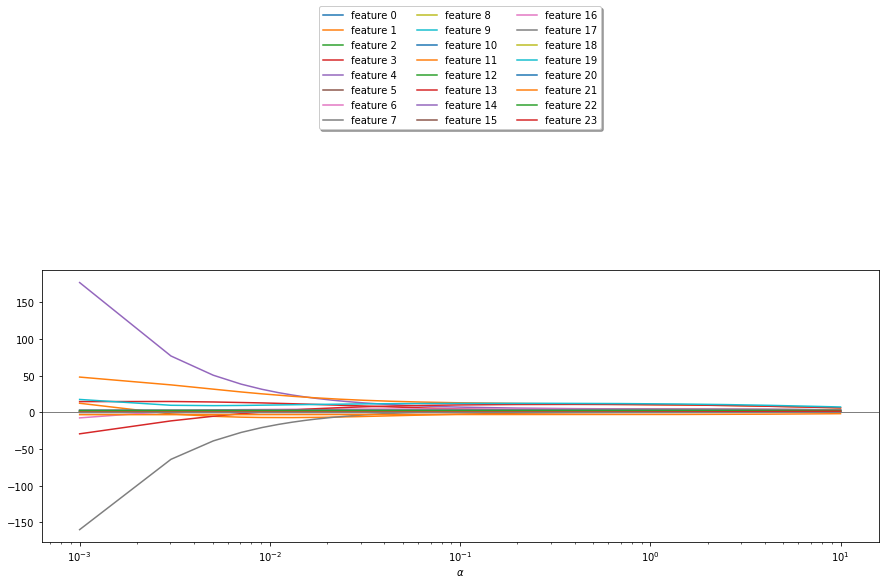

In [74]:
fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso

In [86]:
from sklearn.linear_model import Lasso
x_range = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [87]:
print(train_score_list)
print(test_score_list)

[0.8984759322229999, 0.898466913260895, 0.898362748937547, 0.8966754748720904, 0.8952753233656656, 0.8645636436957567, 0.3093785676466878]
[0.8772600746507033, 0.8772692734957668, 0.8773508894665999, 0.8763407362817529, 0.8790672764037538, 0.8685928350165445, 0.37493323135009654]


Text(0.5,0,'$\\alpha$')

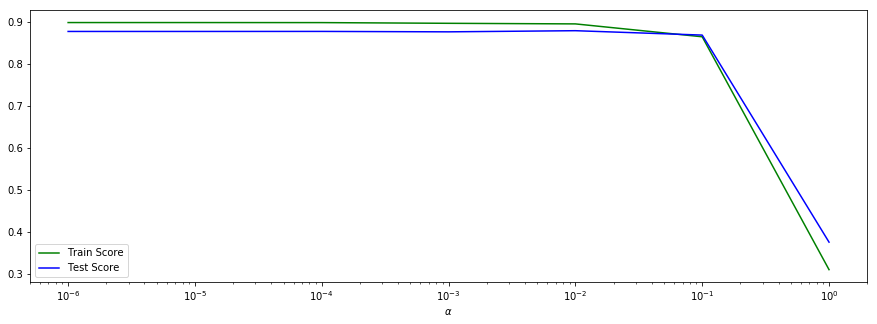

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


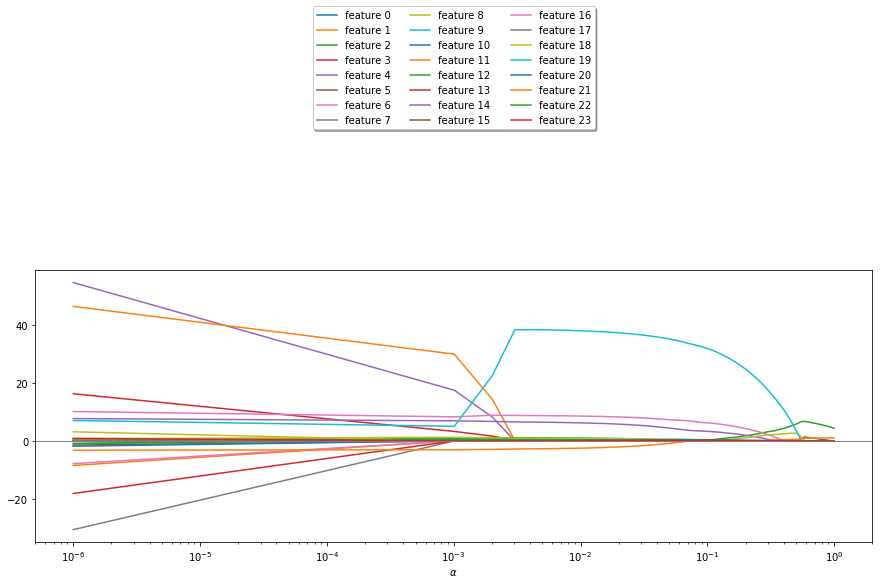

In [89]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.000001, 0.1, 100).reshape(-1,1)
x_range2 = np.linspace(0.1, 1, 100).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Text(0,0.5,'Audit_Risk')

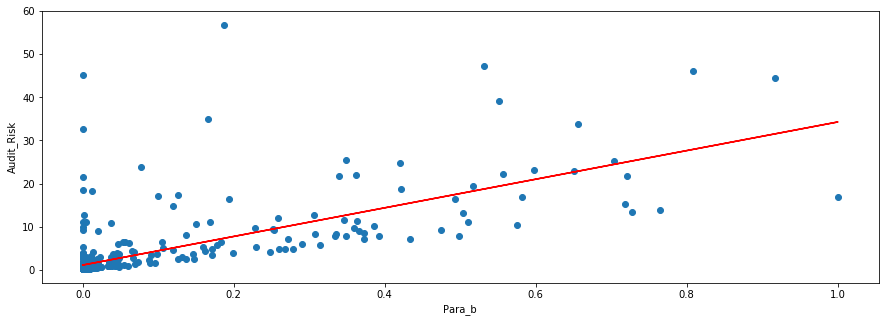

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.000001)
X_train_Parab = X_train[:,4].reshape(-1,1)
lasso.fit(X_train_Parab,y_train)
y_predict = lasso.predict(X_train_Parab)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_Parab, y_predict, c = 'r')
plt.scatter(X_train_Parab,y_train)
plt.xlabel('Para_b')
plt.ylabel('Audit_Risk')

Text(0,0.5,'Audit_Risk')

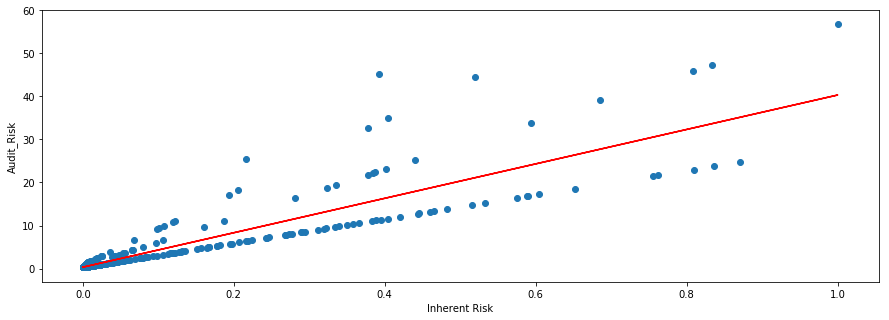

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.001)
X_train_inherent = X_train[:,19].reshape(-1,1)
lasso.fit(X_train_inherent,y_train)
y_predict = lasso.predict(X_train_inherent)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_inherent, y_predict, c = 'r')
plt.scatter(X_train_inherent,y_train)
plt.xlabel('Inherent Risk')
plt.ylabel('Audit_Risk')

# SGD Regressor

In [94]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=0, max_iter=10000, learning_rate='optimal', penalty='l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-16132946766.572224
-16668543902.842993


# SVM Simple Regression

In [100]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5060167596102427
0.5919514281025977


# SVM Kernelized Regression - RBF

In [139]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svr_rbf = SVR(kernel='rbf', C=x, gamma='auto', epsilon=.1)
    svr_rbf.fit(X_train,y_train)
    train_score_list.append(svr_rbf.score(X_train,y_train))
    test_score_list.append(svr_rbf.score(X_test, y_test))

In [140]:
print(train_score_list)
print(test_score_list)

[0.5060167596102427, 0.8461285116976154, 0.9592423859990995, 0.985448933379124, 0.9939974497700347]
[0.5919514281025977, 0.8786269765022873, 0.9591005632111863, 0.9529107643448077, 0.9515347490077933]


Text(0.5,0,'C')

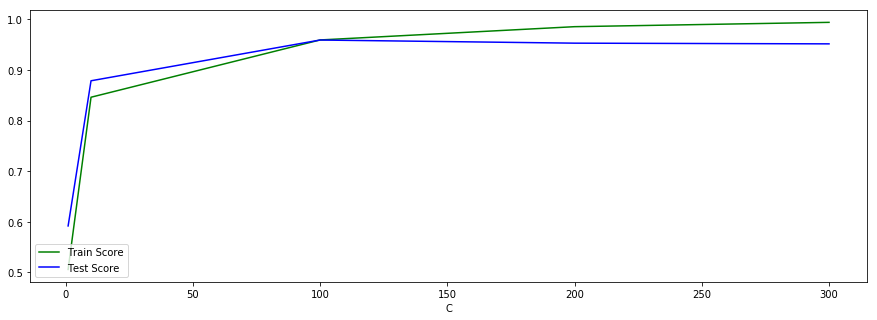

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [142]:
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []

for x in g_range:
    svr_rbf = SVR(kernel='rbf', C=200, gamma=x, epsilon=.1)
    svr_rbf.fit(X_train,y_train)
    train_score_list.append(svr_rbf.score(X_train,y_train))
    test_score_list.append(svr_rbf.score(X_test, y_test))

In [143]:
print(train_score_list)
print(test_score_list)

[0.9168999980523355, 0.9997687372902656, 0.9998935204454846, 0.9998789649948756]
[0.9263743796789052, 0.9817595155614295, 0.8245661606903202, 0.64228991038444]


Text(0.5,0,'Gamma')

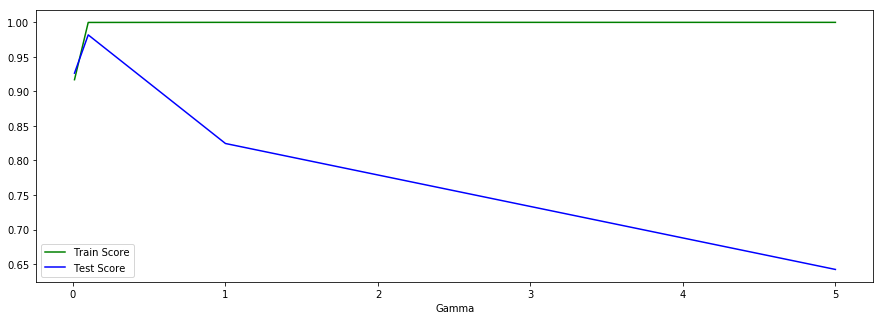

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(g_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(g_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'Gamma')

# SVM Kernelized Regression - Linear


In [146]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svr_lin = SVR(kernel='linear', C=x)
    svr_lin.fit(X_train,y_train)
    train_score_list.append(svr_lin.score(X_train,y_train))
    test_score_list.append(svr_lin.score(X_test, y_test))

In [147]:
print(train_score_list)
print(test_score_list)

[0.823146316714535, 0.826388351325426, 0.8270944542676535, 0.8272125272592424, 0.8273468040343605]
[0.846897845797304, 0.8487884573249889, 0.848936174603426, 0.8489390566254263, 0.8489925804997965]


Text(0.5,0,'C')

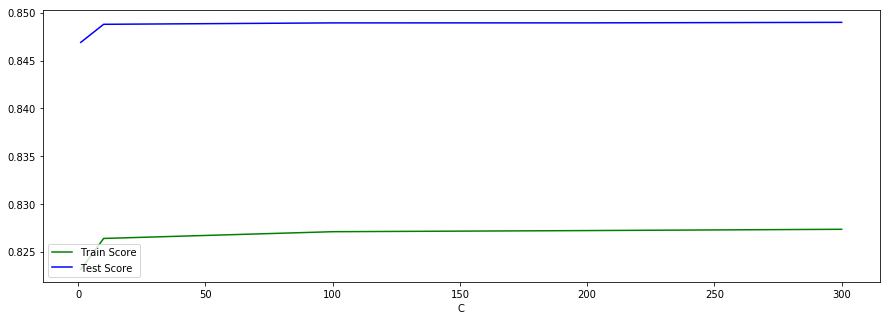

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

# SVM Kernelized Regression - Polynomial

In [158]:
deg_range = [1,2,3,4]

train_score_list = []
test_score_list = []

for x in deg_range:
    svr_poly = SVR(kernel='poly', C=200, degree=x, epsilon=.1,coef0=1)
    svr_poly.fit(X_train,y_train)
    train_score_list.append(svr_poly.score(X_train,y_train))
    test_score_list.append(svr_poly.score(X_test, y_test))

In [159]:
print(train_score_list)
print(test_score_list)

[0.8262928203469615, 0.978505801887387, 0.9974683339201073, 0.9998036549310705]
[0.8487427871145362, 0.9551316682053572, 0.9666178199561031, 0.9888870512451546]


Text(0.5,0,'Degree')

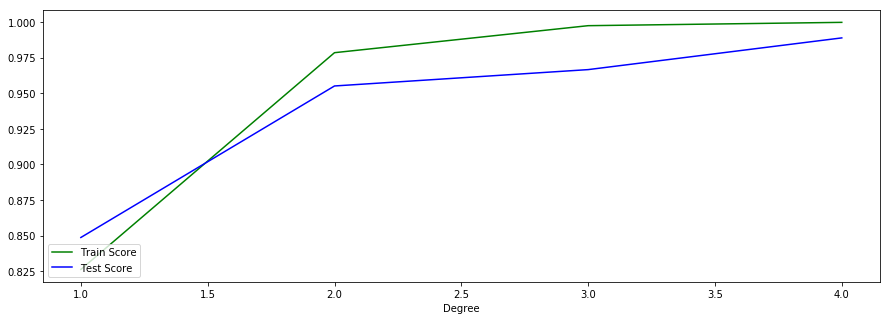

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(deg_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(deg_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'Degree')

In [161]:
coef_range = [1,2,3,4]

train_score_list = []
test_score_list = []

for x in coef_range:
    svr_poly = SVR(kernel='poly', C=200, degree=4, epsilon=.1,coef0=x)
    svr_poly.fit(X_train,y_train)
    train_score_list.append(svr_poly.score(X_train,y_train))
    test_score_list.append(svr_poly.score(X_test, y_test))

In [162]:
print(train_score_list)
print(test_score_list)

[0.9998036549310705, 0.9998971268104676, 0.9999119801226456, 0.9999144358949384]
[0.9888870512451546, 0.9960514835132477, 0.9972696673280446, 0.9978322700113073]


Text(0.5,0,'Coef')

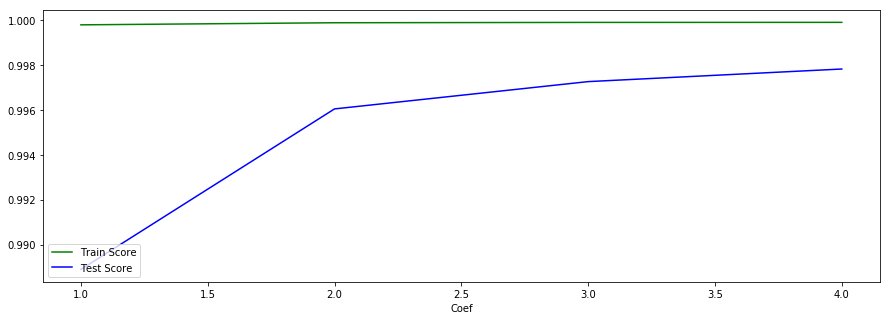

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(coef_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(coef_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'Coef')

# Classification Task

In [164]:
y = data['Risk']
data.drop(['Risk'],axis=1, inplace=True)
X= data

In [165]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# LinearSVC

In [166]:

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9813780260707635
0.9888268156424581


# SVC Kernel - RBF

In [178]:
from sklearn.svm import SVC

c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_rbf = SVC(kernel='rbf', gamma='auto',C=x)
    svc_rbf.fit(X_train,y_train)
    train_score_list.append(svc_rbf.score(X_train,y_train))
    test_score_list.append(svc_rbf.score(X_test, y_test))

In [179]:
print(train_score_list)
print(test_score_list)

[0.9664804469273743, 0.9739292364990689, 0.9832402234636871, 0.9851024208566108, 0.9851024208566108]
[0.9776536312849162, 0.9832402234636871, 0.9832402234636871, 0.9888268156424581, 0.9888268156424581]


Text(0.5,0,'C')

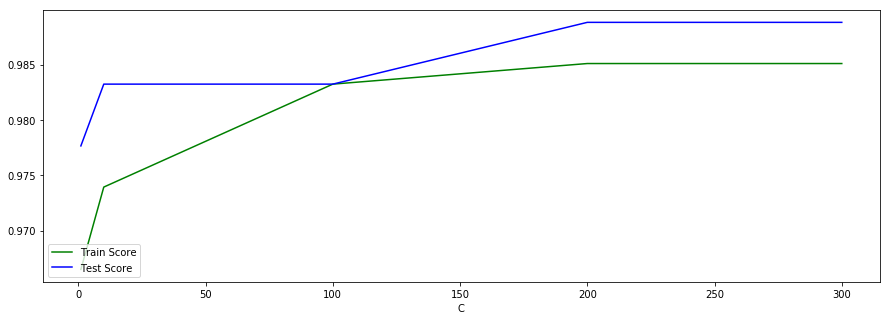

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [181]:
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []

for x in g_range:
    svc_rbf = SVC(kernel='rbf', gamma=x,C=200)
    svc_rbf.fit(X_train,y_train)
    train_score_list.append(svc_rbf.score(X_train,y_train))
    test_score_list.append(svc_rbf.score(X_test, y_test))

In [182]:
print(train_score_list)
print(test_score_list)

[0.9832402234636871, 0.9888268156424581, 0.994413407821229, 0.9962756052141527]
[0.9888268156424581, 0.9776536312849162, 0.9832402234636871, 0.9720670391061452]


Text(0.5,0,'Gamma')

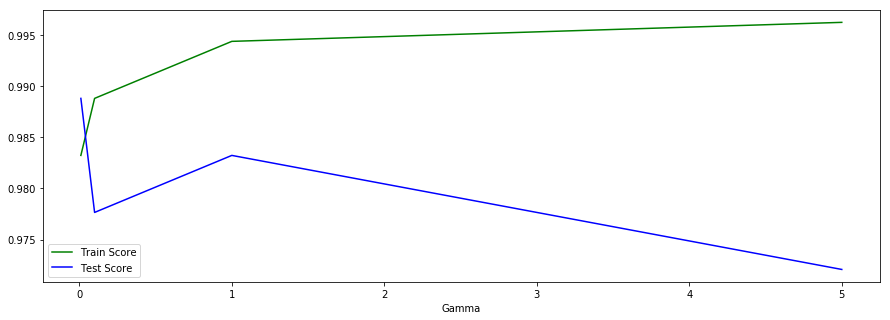

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(g_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(g_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'Gamma')

# SVC Kernel - Linear

In [184]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.9739292364990689, 0.9851024208566108, 0.9925512104283054, 0.9906890130353817, 0.994413407821229]
[0.9832402234636871, 0.9832402234636871, 0.9888268156424581, 0.9888268156424581, 0.994413407821229]


Text(0.5,0,'C')

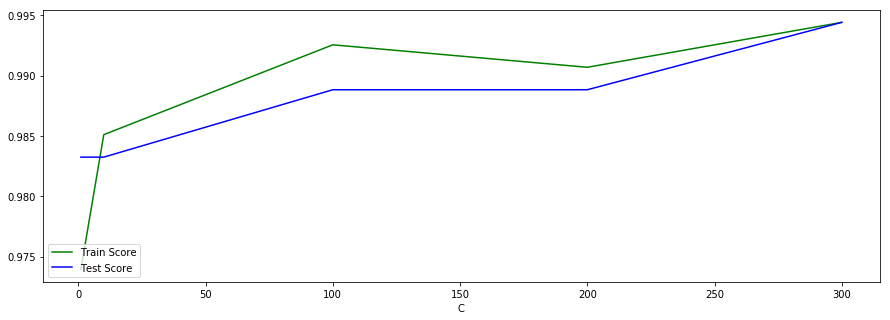

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

# SVC Kernel - Polynomial

In [186]:
deg_range = [1,2,3,4]

train_score_list = []
test_score_list = []

for x in deg_range:
    svc_poly = SVC(kernel='poly', degree=x, C=200)
    svc_poly.fit(X_train,y_train)
    train_score_list.append(svc_poly.score(X_train,y_train))
    test_score_list.append(svc_poly.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.9869646182495344, 0.9702048417132216, 0.9459962756052142, 0.8715083798882681]
[0.9888268156424581, 0.9776536312849162, 0.9608938547486033, 0.8491620111731844]


Text(0.5,0,'Degree')

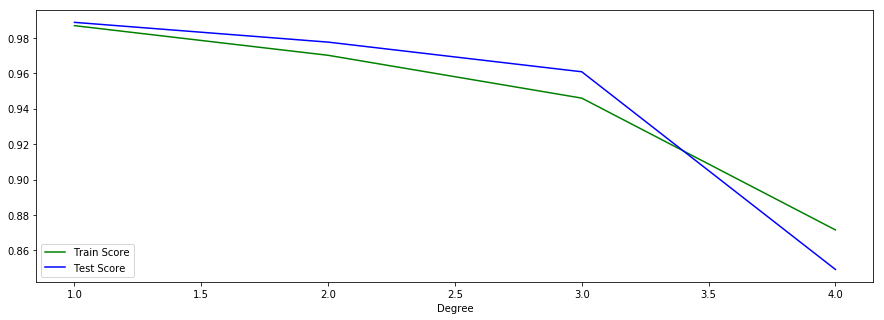

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(deg_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(deg_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.grid(True)
plt.xlabel(r'Degree')

In [193]:
deg_range = [1,2,3,4]
c_range = [1,10,100,200,300]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

Text(0.5,0,'Degree and C')

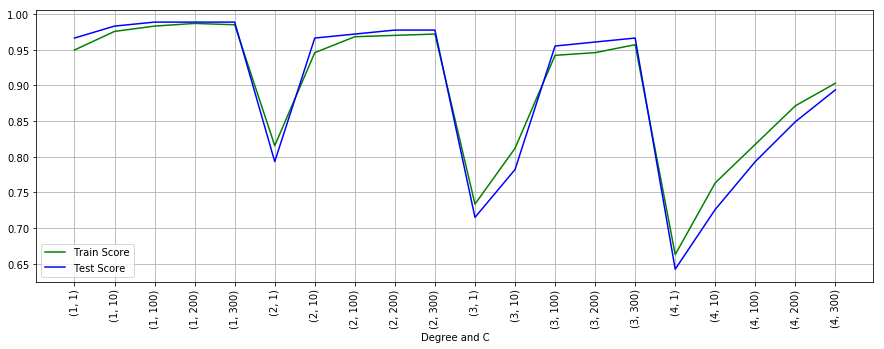

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and C')